# Lineaire Algebra

## Notatie
We volgen doorheen de cursus de notatie conventies in [Goodfellow et al. (2016, _xi-xiv_)](https://www.deeplearningbook.org/front_matter.pdf).

## Numerieke primitieven
Numerieke waarden worden in machine learning voorgesteld als één van volgende wiskundige objecten: **scalairen**, **vectoren**, **matrices** of **tensors**.

### Scalairen
Een scalaire waarde (op simpelwel "**scalair**") is gewoon een **enkelvoudig getal** - in tegenstelling tot de andere objecten die een verzameling van meerdere getallen voorstellen.  
  
We zullen ze in wiskundige notatie aanduiden met schuingedrukte kleine letters, bv. $s \in \mathbb{R}$.

Ze hebben telkens een bepaald type:  
- natuurlijk: $\mathbb{N} = \{0, 1, 2, 3, ...\}$
- geheel: $\mathbb{Z} = \{..., -3, -2, -1, 0, 1, 2, 3, ...\}$
- rationaal: $\mathbb{Q} = \{..., -1.0, -0.5, 0, 0.5, 1, ...\}$
- reëel: $\mathbb{R} = \mathbb{Q} \cup \{\pi, e, ...\}$
- enz.

### Vectoren
**Een vector is een geordende reeks van getallen van éénzelfde type**. Ieder individueel getal wordt geïdentificeerd door de _index_ binnen de ordening (startend bij $1$).
Een vector duiden we in kleine letters en in het vet aan, bv. $\pmb{x}$. Het eerste element duiden we aan met $x_1$, het laatste met $x_n$. Wanneer we de elementen expliciet willen voorstellen,
gebruiken we een kolom met vierkante haakjes: 
$$
\pmb{x} = \begin{bmatrix}
x_1 \cr
\vdots  \cr
x_i \cr
\vdots  \cr
x_n
\end{bmatrix}
$$
Om het type aan te duiden gebruiken we bv. $\mathbb{R}^n$. 
We kunnen vectoren zien als de coordinaten van individuele punten in een $n$-dimensionele ruimte.

In [ ]:
import numpy as np
import plotly.graph_objects as go

In [10]:
# Define two points in 3D space as vectors
vector_a = np.array([2, 3, 1])  # Point A: (2, 3, 1)
vector_b = np.array([4, 1, 5])  # Point B: (4, 1, 5)

# Create traces for the 3D plot
traces = []

# Add origin point
traces.append(
    go.Scatter3d(
        x=[0],
        y=[0],
        z=[0],
        mode="markers",
        marker={"size": 8, "color": "black"},
        name="Origin (0,0,0)",
        showlegend=True,
    )
)

# Add point A
traces.append(
    go.Scatter3d(
        x=[vector_a[0]],
        y=[vector_a[1]],
        z=[vector_a[2]],
        mode="markers+text",
        marker={"size": 8, "color": "red"},
        text=["A"],
        textposition="middle right",
        name=f"Point A {tuple(vector_a)}",
        showlegend=True,
    )
)

# Add point B
traces.append(
    go.Scatter3d(
        x=[vector_b[0]],
        y=[vector_b[1]],
        z=[vector_b[2]],
        mode="markers+text",
        marker={"size": 8, "color": "blue"},
        text=["B"],
        textposition="middle right",
        name=f"Point B {tuple(vector_b)}",
        showlegend=True,
    )
)

# Add vector arrows from origin to points
# Vector A arrow
traces.append(
    go.Scatter3d(
        x=[0, vector_a[0]],
        y=[0, vector_a[1]],
        z=[0, vector_a[2]],
        mode="lines",
        line={"color": "red", "width": 6},
        name="Vector A",
        showlegend=False,
    )
)

# Vector B arrow
traces.append(
    go.Scatter3d(
        x=[0, vector_b[0]],
        y=[0, vector_b[1]],
        z=[0, vector_b[2]],
        mode="lines",
        line={"color": "blue", "width": 6},
        name="Vector B",
        showlegend=False,
    )
)

# Create the figure
fig = go.Figure(data=traces)

# Update layout
fig.update_layout(
    title="Two points in 3D space represented as vectors",
    scene={
        "xaxis_title": "X-axis",
        "yaxis_title": "Y-axis",
        "zaxis_title": "Z-axis",
        "camera": {"eye": {"x": 1.5, "y": 1.5, "z": 1.5}},
    },
    width=800,
    height=600,
)

# Show the plot
fig.show()

### Matrices
Wanneer we bijvoorbeeld niet 1 maar $m$ punten in een $n$ dimensionele ruimte willen weergeven, kunnen we een **matrix** notatie gebruiken: $\pmb{X} \isin \mathbb{R}^{mxn}$.
**Een matrix is een geordende reeks van vectoren**.
$$
\pmb{X} = \begin{bmatrix}
x_{1,1} & \ldots & x_{1,j} & \ldots & x_{1,n} \cr
\vdots  &  & \vdots &  & \vdots \cr
x_{i,1} & \ldots & x_{i,j} & \ldots & x_{i,n} \cr
\vdots  &  & \vdots &  & \vdots \cr
x_{m,1} & \ldots & x_{m,j} & \ldots & x_{m,n}
\end{bmatrix}
$$

De rijen worden gevormd door **rij-vectoren**:
$$
\pmb{x_i} = [x_{i, 1}, \ldots, x_{i, j}, \ldots, x_{i, n}]^T
$$
De kolommen worden gevormd door **kolom-vectoren**:
$$
\pmb{x_j} = \begin{bmatrix}
x_{1, j} \cr
\vdots  \cr
x_{i, j} \cr
\vdots  \cr
x_{n, j}
\end{bmatrix}
$$

De notatie $\ldots^T$ duidt op **transpositie** tussen rijen en kolommen.
$$
\pmb{X^T} = \begin{bmatrix}
x_{1,1} & \ldots & x_{i,1} & \ldots & x_{m,1} \cr
\vdots  &  & \vdots &  & \vdots \cr
x_{1,j} & \ldots & x_{i,j} & \ldots & x_{m,j} \cr
\vdots  &  & \vdots &  & \vdots \cr
x_{1,n} & \ldots & x_{i,n} & \ldots & x_{m,n}
\end{bmatrix}
$$


:::{note} y, X
In machine learning worden (uni-variate) target waarden doorgaans aangeduid met de _vector_ $\pmb{y}$. Uni-variaat wil zeggen dat het over slechts 1 target gaat per input. Als over (uni-variate) model outputs gaat,
gebruiken we $\pmb{\hat{y}}$ om aan te duiden dat het over _schattingen_ gaat.  
De inputs worden aangeduid met de _matrix_ $\pmb{X}$, waarbij de **rij-vector** $\pmb{x_i} = [x_{i, 1}, \ldots, x_{i, j}, \ldots, x_{i, n}]^T$ de $i$-de input is.
:::


### Tensors
Wanneer we het concept van een matrix uitbreiden naar een **N-Dimensionele _grid_ van vectoren**, spreken we van een **tensor**.  
We kunnen dit het best illustreren aan de hand van beeld-data. Een RGB-afbeelding bestaat uit een verzameling pixels die geordend zijn in een 2-dimensionele _grid_.
De dimensies worden bepaald door de resolutie; het aantal horizontale en verticale pixels. Iedere pixel is een vector met 3 waarden, overeenkomstig met de _channels_: **R**ood, **G**roen, **B**lauw.

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

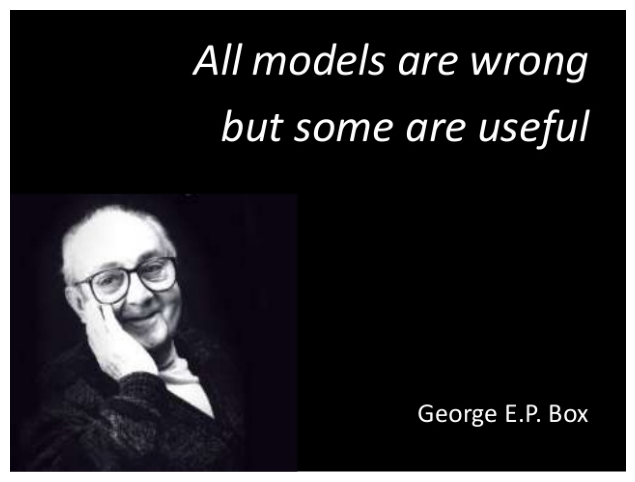

In [ ]:
with Image.open("../../../img/all_models_are_wrong.jpg") as img:
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [32]:
h, w, c = np.array(img).shape  # (height, width, channels)

print(f"Image dimensions: height={h}, width={w}, channels={c}")

Image dimensions: height=479, width=638, channels=3


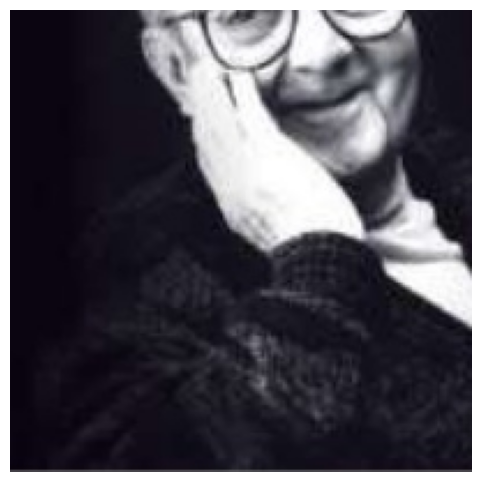

In [54]:
# Sliced image
img_cropped = np.array(img)[-200:, :200, :]
plt.figure(figsize=(10, 6))
plt.imshow(img_cropped)
plt.axis("off")
plt.show()

In [65]:
from matplotlib import patches

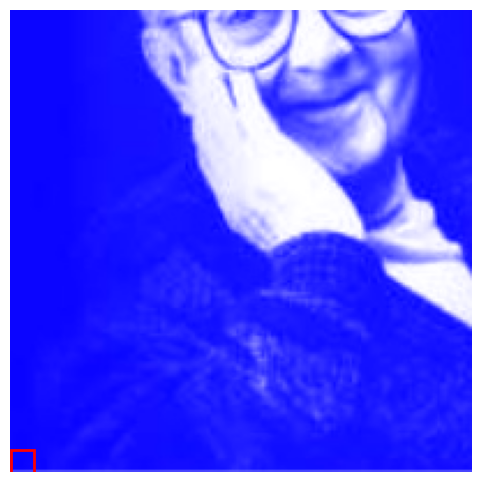

In [ ]:
img_cropped_blue = img_cropped.copy()
img_cropped_blue[:, :, 2] = 255  # Set blue channel to max

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img_cropped_blue)

# Add rectangle to indicate 10x10 region from bottom-left corner
# Rectangle coordinates: (x, y, width, height)
# Note: matplotlib uses (0,0) at top-left, so we need to adjust for bottom-left
height, width = img_cropped_blue.shape[:2]
rect = patches.Rectangle((0, height - 10), 10, 10, linewidth=2, edgecolor="red", facecolor="none")
ax.add_patch(rect)

ax.axis("off")
plt.show()

In [ ]:
# 10x10x3 array from bottom-left corner
np.array(img)[-10, :10, :]

array([[12,  6, 18],
       [11,  5, 17],
       [10,  4, 16],
       [ 9,  3, 15],
       [ 9,  3, 15],
       [ 9,  3, 15],
       [ 9,  3, 15],
       [10,  4, 16],
       [10,  4, 16],
       [11,  5, 17]], dtype=uint8)

In [71]:
# Single pixel vector
np.array(img)[-100, 100, :]

array([27, 26, 31], dtype=uint8)

🚧